In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Reading the Dataset

In [4]:
df = pd.read_csv('../input/movie-classifier/Multi_Label_dataset/train.csv')

In [5]:
df = df.head(2300)

In [6]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Converting the images into Numpy array to train the CNN

In [7]:
width = 224
height = 224
X = []
for i in tqdm(range(df.shape[0])):
  path = '../input/movie-classifier/Multi_Label_dataset/Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 2300/2300 [00:21<00:00, 104.86it/s]


In [8]:
X.shape

(2300, 224, 224, 3)

In [9]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(2300, 25)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

# Preparing the model

In [11]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Softmax

def create_model_1():
    
    model = Sequential([
        Conv2D(16, 3, padding='same', activation='relu',input_shape=X_train[0].shape),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.3),
        Conv2D(32, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.3),
        Conv2D(64, 3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.4),
        Flatten(),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(25,activation='sigmoid')
    ])
    model.summary()
    return model

In [12]:

def create_model_2():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=128, activation='relu'))
    model.add(keras.layers.Dense(units=25, activation='softmax'))

    model.summary()
    return model

In [13]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model


In [14]:
# def create_vgg():
#     vgg = VGG19(input_shape=X_train[0].shape, weights=None, include_top=False) #Training with Imagenet weights
#     x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
#     prediction = Dense(25, activation='softmax')(x) # We have 25 classes, and so, the prediction is being done on 25
#     for layer in vgg.layers:
#         layer.trainable = True
#     #Creating model object 
#     model = Model(inputs=vgg.input, outputs=prediction)
#     model.summary()
#     return model

In [15]:
def create_model_vgg():
    #model based on VGG19
    model = Sequential()
    model.add(Conv2D(input_shape=X_train[0].shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=25, activation="softmax"))
    model.summary()
    return model

#This is a function that creates a Keras convolutional neural network model using the VGG19 architecture for classification with 25 classes. The model is created from scratch, without using any pre-trained weights. The model has 16 convolutional layers with filters ranging from 64 to 512, using a kernel size of 3x3 and the ReLU activation function. These layers are followed by five max pooling layers with a pool size of 2x2. 
#The output of the convolutional layers is flattened and passed through three dense layers with 4096 units each, using the ReLU activation function for all layers. The final dense layer has 25 units and uses the softmax activation function for the output.


In [16]:
from keras.layers import Input
from tensorflow import keras
from tensorflow.keras import layers as tf
def create_model_inception():
    inputs = keras.Input(shape=(224, 224, 3))

    # Define the stem convolutional block
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Define the Inception module
    y1 = layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='relu')(x)
    y1 = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(y1)

    y2 = layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='relu')(x)
    y2 = layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(y2)
    y3 = layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    y3 = layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='relu')(y3)

    y4 = layers.Conv2D(filters=32, kernel_size=(1, 1), padding='same', activation='relu')(x)

    # Concatenate the outputs of the Inception module
    y = layers.concatenate([y1, y2, y3, y4], axis=-1)

    # Define the rest of the network
    y = layers.MaxPooling2D(pool_size=(2, 2))(y)
    y = layers.Flatten()(y)
    y = layers.Dense(units=128, activation='relu')(y)
    outputs = layers.Dense(units=25, activation='sigmoid')(y)

    # Define the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


Using TensorFlow backend.


In [17]:
# Import the Model and layers modules from Keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers

# Import the MobileNet class from the Keras Applications module
from tensorflow.keras.applications import mobilenet
def create_model_mobilenet():


    # Create the input layer for the MobileNet model
    input_tensor = layers.Input(shape=(224,224,3))

    # Create the MobileNet model and exclude the top layer
    base_model = mobilenet.MobileNet(input_tensor=input_tensor,
                                     weights=None,
                                     include_top=False)

    # Add additional layers on top of the MobileNet model
    x = base_model.output
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    output_tensor = layers.Dense(25, activation="softmax")(x)

    # Create a Model object
    model = Model(input_tensor, output_tensor)
    model.summary()
    return model

In [104]:
from tensorflow.keras.utils import  plot_model

model1=create_model_1()
model2=create_model_2()
model3=create_model_vgg()
model4=create_model_inception()
model5=create_model_mobilenet()
# plot_model(model1, to_file='model_1_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(model2, to_file='model_2_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(model3, to_file='model_vgg_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(model4, to_file='model_inception_plot.png', show_shapes=True, show_layer_names=True)
# plot_model(model5, to_file='model_mobilenet_plot.png', show_shapes=True, show_layer_names=True)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_8 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 56, 56, 32)       

In [105]:
model1=create_model_1()
model2=create_model_2()
modelvgg=create_model_vgg()
modelinc=create_model_inception()
modelnet=create_model_mobilenet()
models=[model1,model2,modelvgg,modelinc,modelnet]
for m in models:
    m.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
batch_normalization_12 (Batc (None, 224, 224, 16)      64        
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 56, 56, 32)       

In [146]:
history={}
for m in models:
    history[m] = m.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=20)
# history2 = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=20)
# historyvgg = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=20)
# historyinc = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=20)
# historynet = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=20)

Train on 2070 samples, validate on 230 samples
Epoch 1/20
2070/2070 [==============================] - 3s 2ms/sample - loss: 0.5998 - accuracy: 0.7272 - val_loss: 3.6769 - val_accuracy: 0.7101
Epoch 2/20
2070/2070 [==============================] - 2s 1ms/sample - loss: 0.2702 - accuracy: 0.9162 - val_loss: 2.3579 - val_accuracy: 0.7110
Epoch 3/20
2070/2070 [==============================] - 2s 1ms/sample - loss: 0.2077 - accuracy: 0.9201 - val_loss: 1.2176 - val_accuracy: 0.7943
Epoch 4/20
2070/2070 [==============================] - 2s 1ms/sample - loss: 0.1778 - accuracy: 0.9298 - val_loss: 12.5266 - val_accuracy: 0.5838
Epoch 5/20
2070/2070 [==============================] - 2s 1ms/sample - loss: 0.1440 - accuracy: 0.9437 - val_loss: 34.1651 - val_accuracy: 0.3607
Epoch 6/20
2070/2070 [==============================] - 2s 1ms/sample - loss: 0.1173 - accuracy: 0.9553 - val_loss: 1.1694 - val_accuracy: 0.8850
Epoch 7/20
2070/2070 [==============================] - 3s 1ms/sample - los

In [149]:
model1.save('model1.h5')
model2.save('model2.h5')
modelvgg.save('modelvgg.h5')
modelinc.save('modelinc.h5')
modelnet.save('modelnet.h5')


In [22]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

In [151]:
models=[model1,model2,modelvgg,modelinc,modelnet]


# Applying the trained model to Predict the Genre of the input image


Image : 33
Actual classes:
Action
Thriller

Model 1
Predicted classes:
Adventure
Thriller

Model 2
Predicted classes:
Comedy
Drama

Model 3
Predicted classes:
Comedy
Western

Model 4
Predicted classes:
Comedy
Drama

Model 5
Predicted classes:
Drama
Comedy


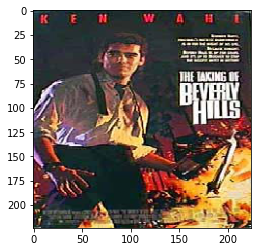

In [192]:

i=33
s=1
img=X_test[i]
plt.imshow(img)
img = img.reshape(1,width,height,3)
print("\nImage :",i)

print("Actual classes:")
random_vals = list(y_test[i])
for a in range(len(y_test[i])):
    if random_vals[a]==1:
        print(classes[a])

for m in models:
    print("\nModel",s)
    y_pred = m.predict(img)
    top2=np.argsort(y_pred[0])[:-4:-1]
    print("Predicted classes:")
    for j in range(2):
        print(classes[top2[j]])
    s+=1

Model <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe5484f4d90>
Music
Sport
Romance
Model <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe54848f4d0>
War
Musical
Action
Model <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fe168e41090>
Comedy
Romance
News
Model <tensorflow.python.keras.engine.training.Model object at 0x7fe168e7add0>
News
Sport
Mystery
Model <tensorflow.python.keras.engine.training.Model object at 0x7fe16924c890>
Western
Horror
Adventure


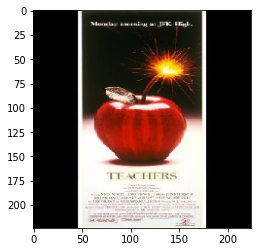

In [143]:
img = image.load_img('../input/movie-classifier/Multi_Label_dataset/Images/tt0088242.jpg',target_size=(width,height,3))

plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df.columns[2:]

for m in models:
    print("Model",str(m))
    y_pred = m.predict(img)
    top3=np.argsort(y_pred[0])[:-4:-1]
    for i in range(3):
      print(classes[top3[i]])

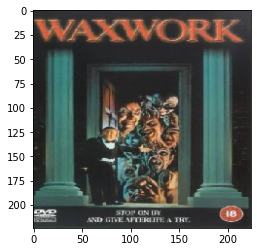

In [163]:
for i in range(4):
    img=X_test[i]
    plt.imshow(img)
    plt.savefig("Image "+ str(i))